In [1]:
#initialize data and format dataframes into variables representing input/output
import pandas as pd
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt

data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_new.csv', header=0, sep=',')
data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_new.csv', header=0, sep=',')

feature_cols = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed',
                'WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure3pm',
                'Cloud9am','Cloud3pm']
output_col = 'RainTomorrow'

X = data_train.loc[:, feature_cols]
y = data_train.RainTomorrow

X_test = data_test.loc[:, feature_cols]
y_test = data_test.RainTomorrow

In [3]:
# functions for logistic regression by sigmoid gradient descent
from numpy.ma.core import exp
# formats input attributes and adds a row of 1 which corresponds to x_0
def generateXvector(X):
  vectorX = np.c_[np.ones((len(X), 1)), X]
  return vectorX
# initializes weights as arbitrary numbers
def theta_init(X):
  theta = np.random.randn(len(X[0])+1, 1)
  return theta
# sigmoid function itself
def sigmoid_function(X):
  return 1/(1+exp(-X))
# logistic regression itself
def Logistics_Regression(X,y,learningrate, iterations):
  y_new = np.reshape(y, (len(y), 1))   
  cost_lst = []
  vectorX = generateXvector(X)
  theta = theta_init(X)
  m = len(X)
  for i in range(iterations):
    gradients = 2/m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)
    theta = theta - learningrate * gradients
    y_pred = sigmoid_function(vectorX.dot(theta))
    cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
    #Calculate the loss for each training instance
    cost_lst.append(cost_value)
  plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
  plt.title('Cost function Graph')
  plt.xlabel('Number of iterations')
  plt.ylabel('Cost')
  return theta

masked_array(
  data=[[-2.07486788],
        [ 1.13284167],
        [-1.28791521],
        [ 1.05866744],
        [-0.80688201],
        [-1.79389617],
        [ 4.48016175],
        [-0.46635743],
        [-0.90867868],
        [ 0.82794888],
        [ 4.77832902],
        [-5.05440358],
        [-0.10451477],
        [ 1.10791054]],
  mask=False,
  fill_value=1e+20)

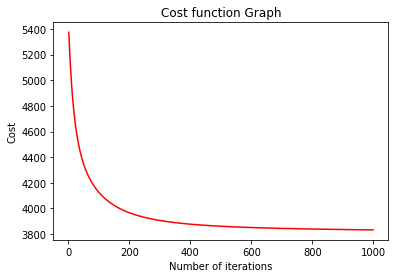

In [ ]:
Logistics_Regression(X.to_numpy(),y.to_numpy(), 1, 1000)

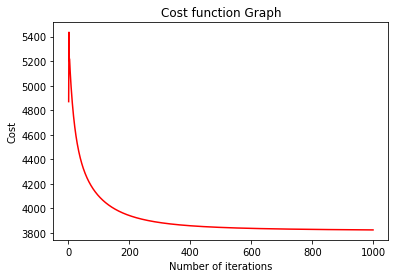

In [4]:
#Testing Accuracy
#X_test = data_test.loc[:, feature_cols]
#y_test = data_test.RainTomorrow
def column(matrix, i):
    return [row[i] for row in matrix]

def pred_y(X,y,learningrate, iteration,X_test, y_test):
    ideal = Logistics_Regression(X,y,learningrate, iteration)
    hypo_line = ideal[0]
    for i in range(1,len(ideal)):
        hypo_line = hypo_line + ideal[i]*column(X_test,i-1)
    logistic_function = sigmoid_function(hypo_line)
    for i in range(len(logistic_function)):
        if logistic_function[i] >= 0.5:
            logistic_function[i] = 1
        else:
            logistic_function[i] = 0
    last1 = np.concatenate((logistic_function.reshape(len(logistic_function),1), y_test.reshape(len(y_test),1)),1)
    return last1

data_cmat = pred_y(X.to_numpy(),y.to_numpy(), 1, 1000, X_test.to_numpy(), y_test.to_numpy())

In [17]:
display(data_cmat)
data_cmat_format = {'y_Actual': data_cmat[:,0],
        'y_Predicted': data_cmat[:,1]
        }

df = pd.DataFrame(data_cmat_format, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
TN = confusion_matrix [0][0]
FP = confusion_matrix [1][0]
FN = confusion_matrix [0][1]
TP = confusion_matrix [1][1]
sens = TP/(TP+FN)
spec = TN/(TN+FP)
prec = TP/(TP+FP)
accu = (TP+TN)/(TP+TN+FP+FN)

print('accuracy = ', accu)
print('percision = ', prec)
print('specificity = ', spec)
print('sensitivity = ', sens)

masked_array(
  data=[[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [1., 1.],
        [0., 0.]],
  mask=False,
  fill_value=1e+20)

Predicted    0.0   1.0
Actual                
0.0        20892  3237
1.0         1253  3056
accuracy =  0.8421126661509248
percision =  0.4856189416812331
specificity =  0.865846077334328
sensitivity =  0.709213274541657


In [16]:
from sklearn.linear_model import LogisticRegression

# Number of iterations
iter  = 1000
# Execute Logistical Regression with sigmoid gradient descent
logReg = LogisticRegression(max_iter = iter).fit(X,y)
# Display the weights of each variable
weights = logReg.coef_[0]
w0 = logReg.intercept_[0]
display(w0)
display(weights)

predictions = logReg.predict(X_test)
display(y_test.to_numpy())
display(predictions)

c_mat = sklearn.metrics.confusion_matrix(y_test.to_numpy(), predictions, labels=None, sample_weight=None, normalize=None)
display(c_mat)

TN, FP, FN, TP = sklearn.metrics.confusion_matrix(y_test.to_numpy(), predictions, labels=None, sample_weight=None, normalize=None).ravel()

sens = TP/(TP+FN)
spec = TN/(TN+FP)
prec = TP/(TP+FP)
accu = (TP+TN)/(TP+TN+FP+FN)

print('accuracy = ', accu)
print('percision = ', prec)
print('specificity = ', spec)
print('sensitivity = ', sens)

#from sklearn.metrics import classification_report
#print(classification_report(y_test, predictions))


-3.3349664629235307

array([ 0.31623324,  0.11525926,  6.5344443 , -1.12512459, -1.69564101,
        6.40424006, -1.43287889, -1.96180857,  0.77026848,  5.182464  ,
       -4.35211596, -0.01958284,  1.13980398])

array([0, 0, 0, ..., 0, 1, 0])

array([0, 0, 0, ..., 0, 1, 0])

array([[20895,  1250],
       [ 3206,  3087]])

accuracy =  0.843308249525283
percision =  0.711782338021674
specificity =  0.9435538496274554
sensitivity =  0.4905450500556173
